## 作業目標
- 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？
- 確保同學知道如何改變參數以及理解 cv2.calcHist 這個函數輸出的資料含義

In [1]:
import os
import keras
from keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 # 載入 cv2 套件
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

train, test = keras.datasets.cifar10.load_data()

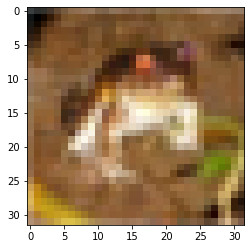

In [2]:
# 讀取圖片
image = train[0][0]

plt.imshow(image)
plt.show()

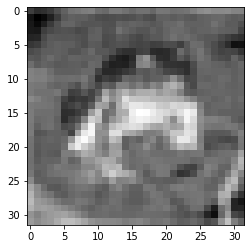

In [3]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

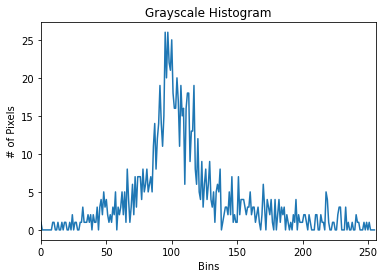

In [4]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

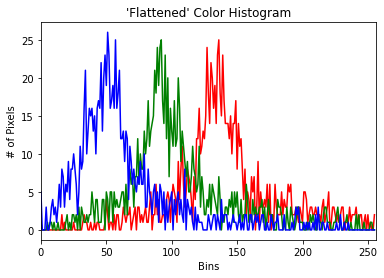

In [5]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

顏色 r 在 [16, 32] 這個 bin 中有： [4.] 個
顏色 g 在 [16, 32] 這個 bin 中有： [17.] 個
顏色 b 在 [16, 32] 這個 bin 中有： [108.] 個


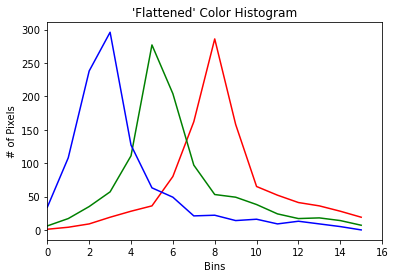

In [6]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
    print("顏色",color, "在 [16, 32] 這個 bin 中有：", hist[1], "個") # 第二個區間
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 16])
plt.show()